CS249 -- Spring 2017 -- D.S. Parker &copy; 2017

# Problem:  Fitting Distribution Parameters to Data

Problem:  given a sequence of random real values, attempt to determine which distribution it follows.

More specifically, develop a program that reads in a numeric table, and --
for each dataset in the table (where each column in the table is a "dataset")
-- determines the distribution and parameters that gives the closest match to it.

For example, if the dataset has 1 column that fits a normal distribution
with mean 2 and standard deviation 3, your program should print the line:
<pre>
normal 2 3
</pre>
As a more interesting example, a demonstration table is included below
that has 6 columns, each with a different distribution.
With this table as input, your program should print the following output:
<pre>
gamma 9 2
normal 4 2
lognormal 0 1
exponential 1
chi-squared 5
logistic 3 2
</pre>
For simplicity, the parameters used in this assignment will always be integers,
so the printed output should always have integer parameter values.


## fitdistr

Your program can use the "fitdistr" function in the MASS library in order to fit distributions to data.

To use fitdistr, you can install the MASS package in R

In [8]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("MASS"))  install.packages("MASS")  # we need the MASS package

library(MASS)  #  load the MASS package

 ?fitdistr      #  look at the help for the fitdistr function



##  Generate a sample table with 6 columns (datasets)

The table is of size (N x 6), where N=10000.
Each column in this dataset is a random sample from a different distribution.

In [3]:
# we generate a table whose columns are random samples from different distributions

N = 10000
D1 = rgamma( N, 9, 2 )
D2 = rnorm( N, 4, 2 )
D3 = rlnorm( N, 0, 1 )
D4 = rexp( N, 1 )
D5 = rchisq( N, 5 )
D6 = rlogis( N, 3, 2 )

# All parameter values in this assignment will be integers !

Table = round(cbind( D1,D2,D3,D4,D5,D6 ),8)

colnames(Table) = c("D1","D2","D3","D4","D5","D6")

# print the first few lines of the table:

head(Table)

D1,D2,D3,D4,D5,D6
5.094297,2.319137,1.4230760,0.32845715,6.694939,8.4438772
3.223781,3.487809,1.6053408,0.51540033,6.096608,1.0531454
5.463771,5.096919,0.6449393,2.44751264,1.001665,-1.7294434
4.643613,1.872262,5.6923157,0.06465585,6.111130,-1.1320177
1.609345,3.945761,1.0106978,0.27462361,2.585936,4.4902404
2.491460,2.817429,2.8824729,0.43196404,5.556245,-0.6091252


## For fun, plot a histogram of each column in the Table

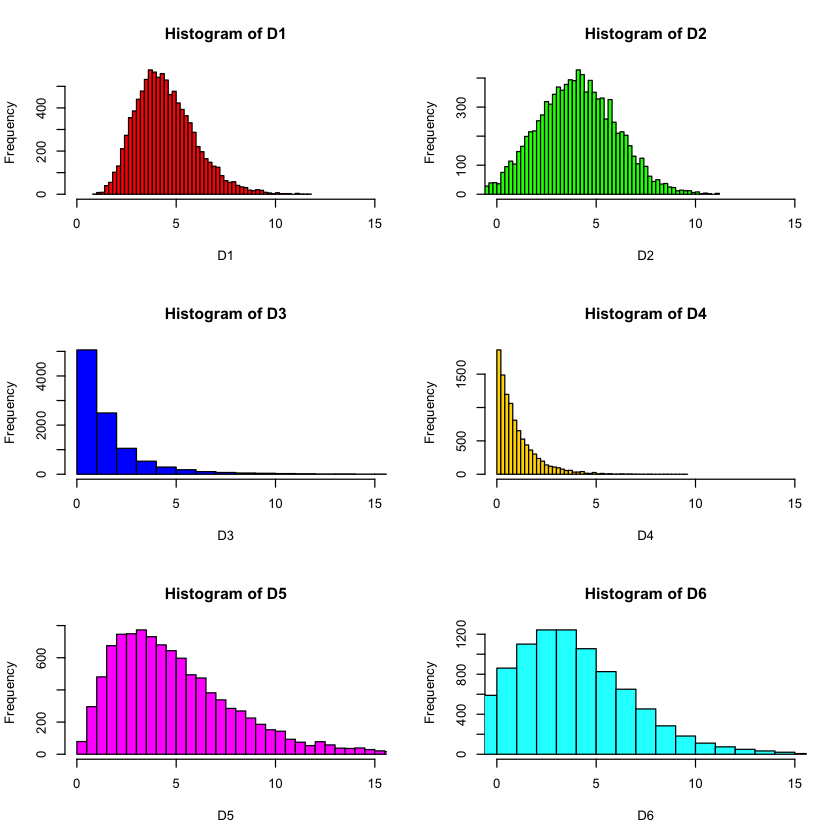

In [4]:
opar = par(mfrow = c(3,2))

# make 3 rows of plots, with 2 plots per row

B=60
hist( D1, col="red", xlim=c(0,15), breaks=B )
hist( D2, col="green", xlim=c(0,15), breaks=B )
hist( D3, col="blue", xlim=c(0,15), breaks=B )
hist( D4, col="gold", xlim=c(0,15), breaks=B )
hist( D5, col="magenta", xlim=c(0,15), breaks=B )
hist( D6, col="cyan", xlim=c(0,15), breaks=B )

par(opar)  # restore previous values of plotting parameters

## Your program should handle these kinds of distributions:

In [5]:
Distribution_name = c(
    "normal",
    "t",
    "chi-squared",
    "lognormal",
    "exponential",
    "gamma",
    "logistic"
)

Distribution_can_have_negative_values = c(
    TRUE,
    TRUE,
    FALSE,
    FALSE,
    FALSE,
    FALSE,
    TRUE
)

Distribution_function = c(
    dnorm,
    dt,
    dchisq,
    dlnorm,
    dexp,
    dgamma,
    dlogis
)

Distribution_color = c(
    "blue",
    "cyan",
    "green",
    "gold",
    "magenta",
    "red",
    "purple"
)

add_curve = function( dist_name, p ) {
    if (dist_name == "normal")      curve( dnorm(x, p[1], p[2] ),    col="blue", lwd=3, add=TRUE )
    if (dist_name == "t")           curve( dt(x, p[1], p[2], p[3] ), col="cyan", lwd=3, add=TRUE )
    if (dist_name == "chi-squared") curve( dnorm(x, p[1] ),          col="green", lwd=3, add=TRUE )
    if (dist_name == "lognormal")   curve( dlnorm(x, p[1], p[2] ), col="gold", lwd=3, add=TRUE )
    if (dist_name == "exponential") curve( dexp(x, p[1] ),         col="magenta", lwd=3, add=TRUE )
    if (dist_name == "gamma")       curve( dgamma(x, p[1], p[2] ),  col="red", lwd=3, add=TRUE )
    if (dist_name == "logistic")    curve( dlogis(x, p[1], p[2] ),  col="purple", lwd=3, add=TRUE )
}

## Example of how to analyze the data in R, with fitdistr:


trying Dataset 1:
Dataset is nonnegative
normal 4 1
               log-likelihood = -18208.119195
t 4 1 13
               log-likelihood = -18153.679646
chi-squared 5
               log-likelihood = -20898.230957
lognormal 1 0
               log-likelihood = -17872.414958
exponential 0
               log-likelihood = -24985.801219
gamma 9 2
               log-likelihood = -17796.410043
logistic 4 1
               log-likelihood = -18180.858511

trying Dataset 2:
Dataset has some negative values, so it cannot follow nonnegative distributions


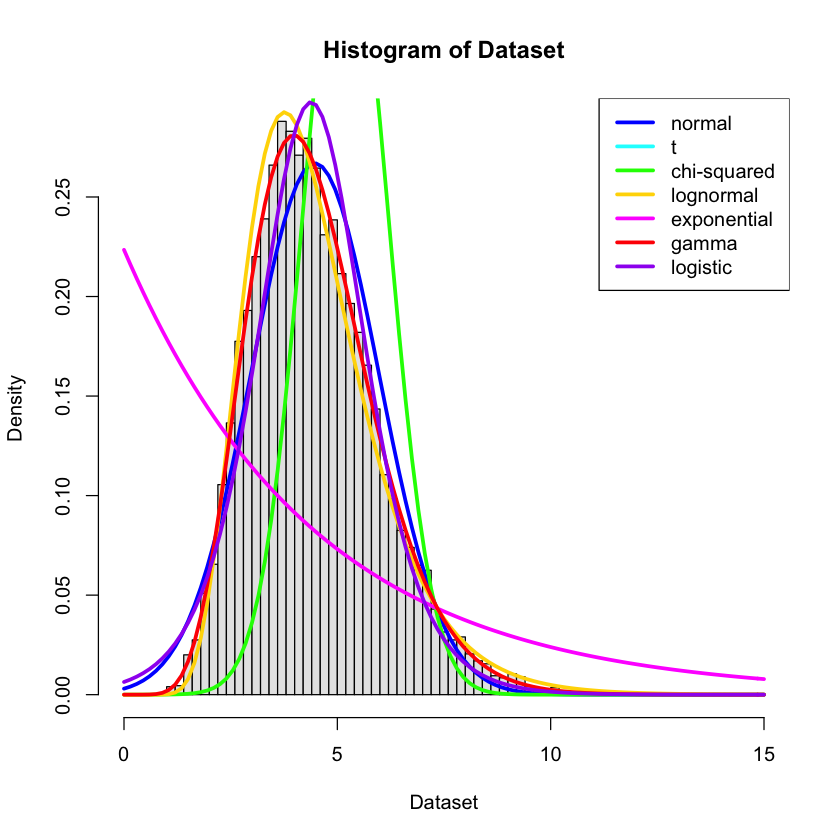

normal 4 2
               log-likelihood = -21130.727555
t 4 2 64
               log-likelihood = -21132.524961
logistic 4 1
               log-likelihood = -21226.823646

trying Dataset 3:
Dataset is nonnegative


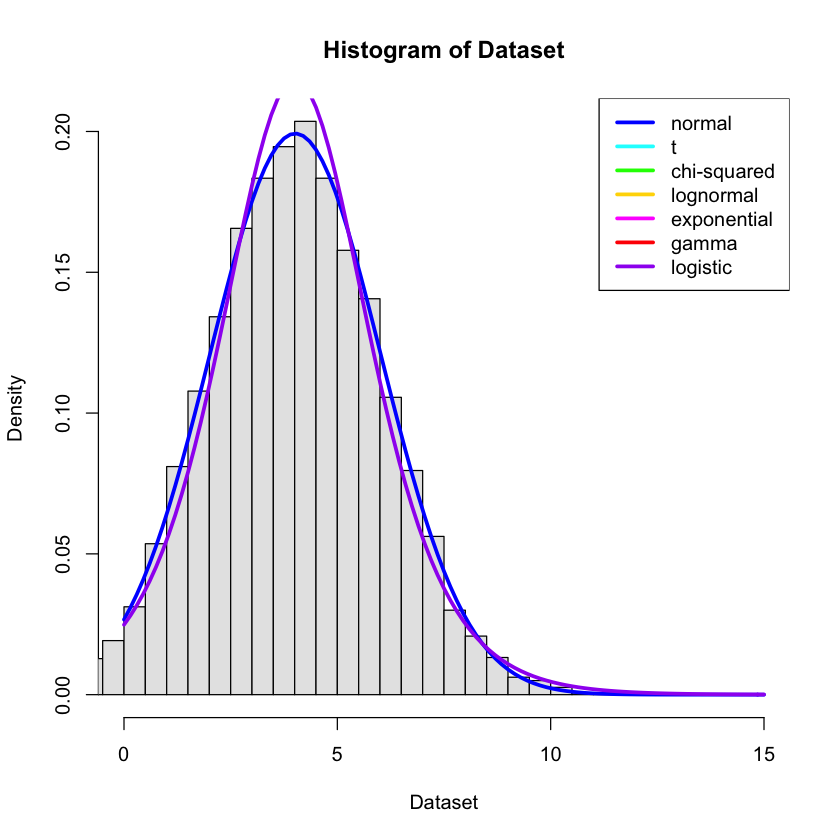

normal 2 2
               log-likelihood = -22701.295954
t 1 1 1
               log-likelihood = -17115.993099
chi-squared 2
               log-likelihood = -15207.855818
lognormal 0 1
               log-likelihood = -14235.609123
exponential 1
               log-likelihood = -15101.343554
gamma 1 1
               log-likelihood = -15080.190804
logistic 1 1
               log-likelihood = -19329.095313

trying Dataset 4:
Dataset is nonnegative


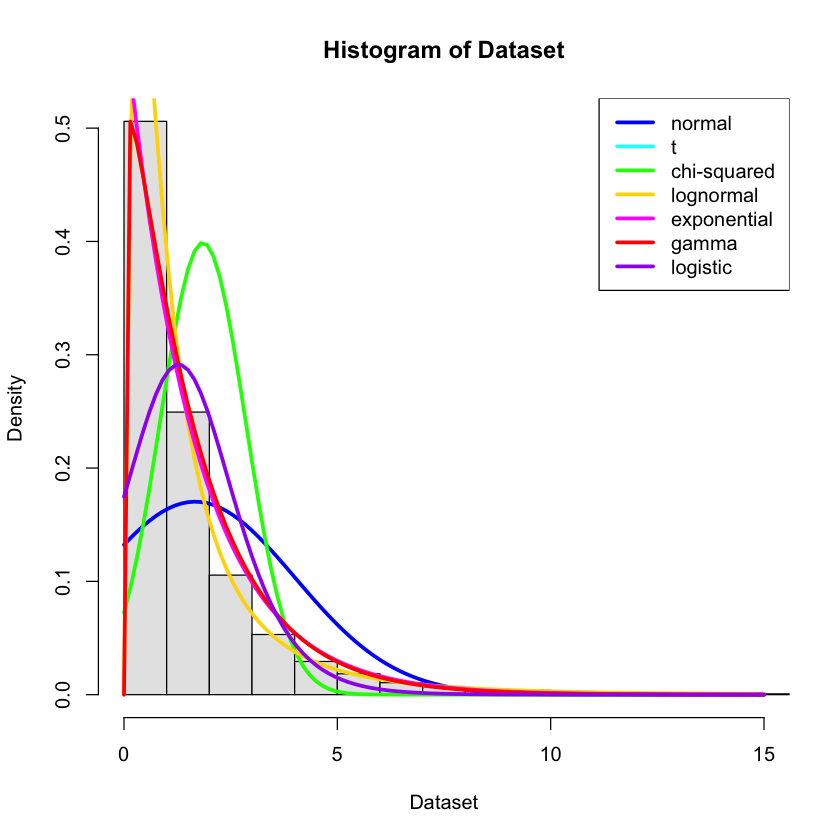

normal 1 1
               log-likelihood = -14061.648089
t 1 1 3
               log-likelihood = -12836.978006
chi-squared 1
               log-likelihood = -10584.130214
lognormal -1 1
               log-likelihood = -10679.714390
exponential 1
               log-likelihood = -9829.699737
gamma 1 1
               log-likelihood = -9829.697976
logistic 1 0
               log-likelihood = -13244.882696

trying Dataset 5:
Dataset is nonnegative


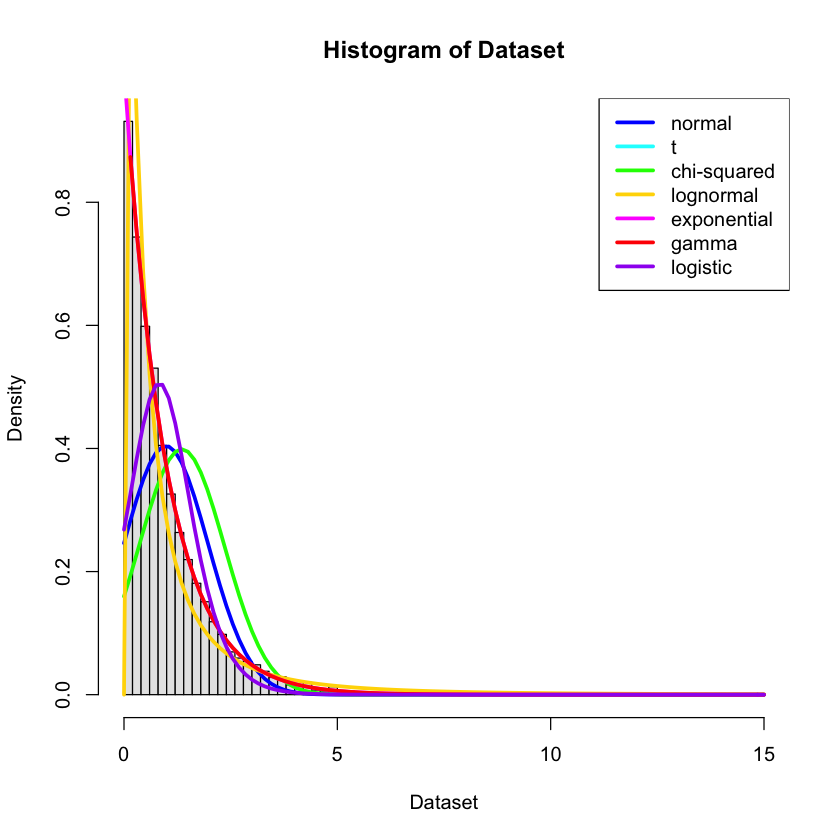

normal 5 3
               log-likelihood = -25688.409273
t 5 3 5
               log-likelihood = -25377.192628
chi-squared 5
               log-likelihood = -24207.946237
lognormal 1 1
               log-likelihood = -24543.363612
exponential 0
               log-likelihood = -26071.372061
gamma 3 1
               log-likelihood = -24207.934025
logistic 5 2
               log-likelihood = -25411.417666

trying Dataset 6:
Dataset has some negative values, so it cannot follow nonnegative distributions


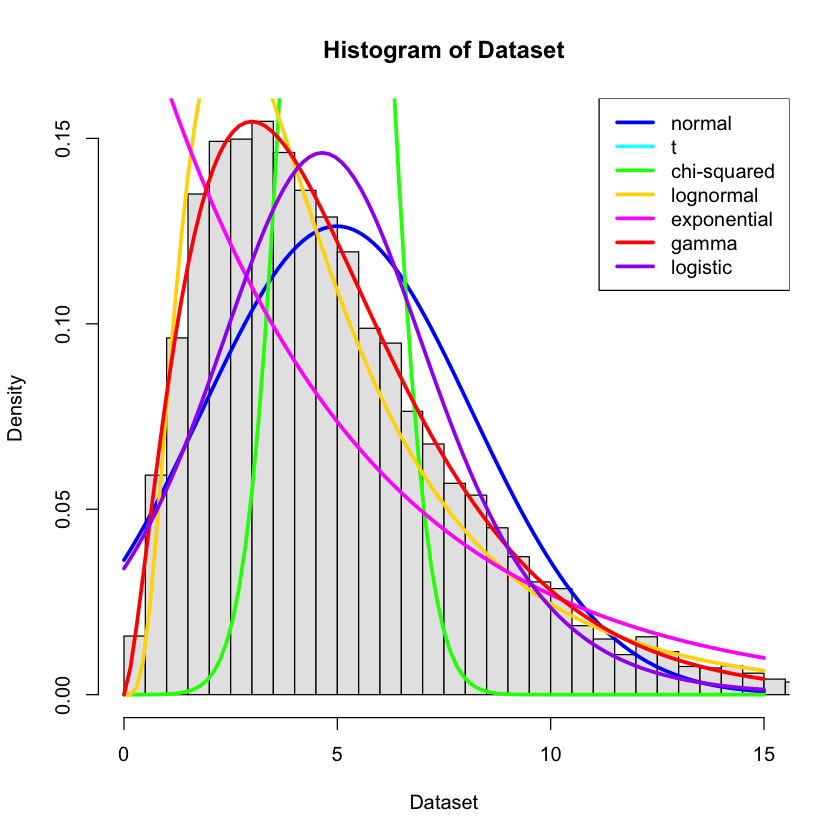

normal 3 4
               log-likelihood = -27102.466171
t 3 3 8
               log-likelihood = -26953.360157
logistic 3 2
               log-likelihood = -26951.885209


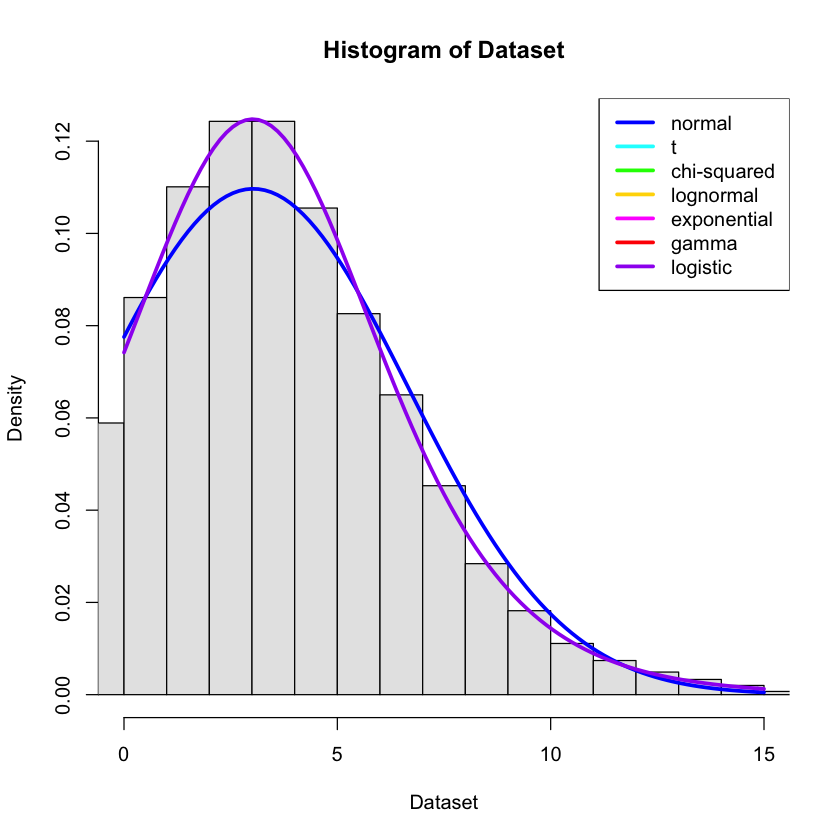

In [6]:
n = nrow(Table)
p = ncol(Table)

for (j in 1:p) {
    Dataset = Table[,j]   #  j-th dataset = j-th column of the data table
    cat(sprintf("\ntrying Dataset %d:\n", j))
    
    Dataset_is_nonnegative = !any( Dataset < 0 )
    if (Dataset_is_nonnegative) {
        cat("Dataset is nonnegative\n")
    } else {
        cat("Dataset has some negative values, so it cannot follow nonnegative distributions\n")
    }

    hist( Dataset, col="gray90", xlim=c(0,15), breaks=50, probability=TRUE )
    # display a histogram for each column Dataset
    legend( "topright", Distribution_name, col=Distribution_color, lwd=3 )

    for (i in 1:length(Distribution_name)) {
        dist_name = Distribution_name[i]
        if (Distribution_can_have_negative_values[i] || Dataset_is_nonnegative) {
            # don't try to fit a nonnegative distribution to data that is negative

            if (dist_name == "chi-squared") {  # fitdistr requires special handling of chi-squared
                fit = suppressWarnings( fitdistr( Dataset, dist_name, list(df=round(mean(Dataset))), method="BFGS" ) )
            } else {
                fit = suppressWarnings( fitdistr( Dataset, dist_name ) )
            }

            # "fit" is the object returned by fitdistr, describing the fit

            fitted_parameters = fit$estimate
            log_likelihood = fit$loglik

            parameter_value_string = paste(round(fitted_parameters), collapse=" ")
            # we round the parameter values so that they are integers.

            # This is what the output is supposed to look like:
            cat(sprintf("%s %s\n", dist_name, parameter_value_string))  

            # To show how good the fit is, we also print the log-likelihood here
            cat(sprintf("               log-likelihood = %f\n", log_likelihood))
            
            add_curve( dist_name, fitted_parameters )  # show the fit on the histogram

            # The optimal distribution is the one with maximum-likelihood
            #  (and:  maximum-likelihood == maximum-log-likelihood).
            # Your program needs to determine which distribution maximizes this.
        }
    }
}


The computation above can take a little while, don't worry about this.
Be patient here ....

## That's it!  Now just write an R script that does this for any dataset it reads in.

To get you started, your R script can be an extension of this outline:

<pre>
#  Read in a table (in csv format) from standard input:
Table = data.matrix(read.csv( file("stdin"), header=TRUE ))


Distribution = c( "normal", "t", "chi-squared", "lognormal", "exponential", "gamma", "logistic")
Distribution_can_have_negative_values = c( TRUE, TRUE, FALSE, FALSE, FALSE, FALSE, TRUE )

for (j in 1:ncol(Table)) {
    Dataset = Table[,j]        #  j-th dataset = the j-th column of the table
    Dataset_is_nonnegative = !any( Dataset < 0 )

    for (i in 1:length(Distribution)) {
        dist_name = Distribution[i]
        if (Distribution_can_have_negative_values[i] || Dataset_is_nonnegative) {
            # don't try to fit a nonnegative distribution to data that is negative

            if (dist_name == "chi-squared") {
                # fitdistr requires special handling of chi-squared
                fit = suppressWarnings( fitdistr( Dataset, dist_name,
                                  list(df=round(mean(Dataset))), method="BFGS" ) )
            } else {
                fit = suppressWarnings( fitdistr( Dataset, dist_name ) )
            }

            fitted_parameters = fit$estimate
            log_likelihood = fit$loglik
            
            parameter_value_string = paste(round(fitted_parameters), collapse=" ")
            # print integer parameters
            cat(sprintf("%s %s\n", dist_name, parameter_value_string))

            # The optimal distribution is the one with maximum-likelihood
            #  (and:  maximum-likelihood == maximum-log-likelihood).
            # The optimal distribution needs to be tracked here .............
        }
    }
}
</pre>


# What your program's output should look like

If your program had been given the Table above as input,
it should print the following six lines of output:
<pre>
gamma 9 2
normal 4 2
lognormal 0 1
exponential 1
chi-squared 5
logistic 3 2
</pre>
For simplicity, the parameters used here will always be integers,
so the printed output should always have integer parameter values.